# Big Data Tools for Business: Real World Uses Cases Project

## <span style="color:red"> Part 2: Real Estate Market Data Exploration in major French cities

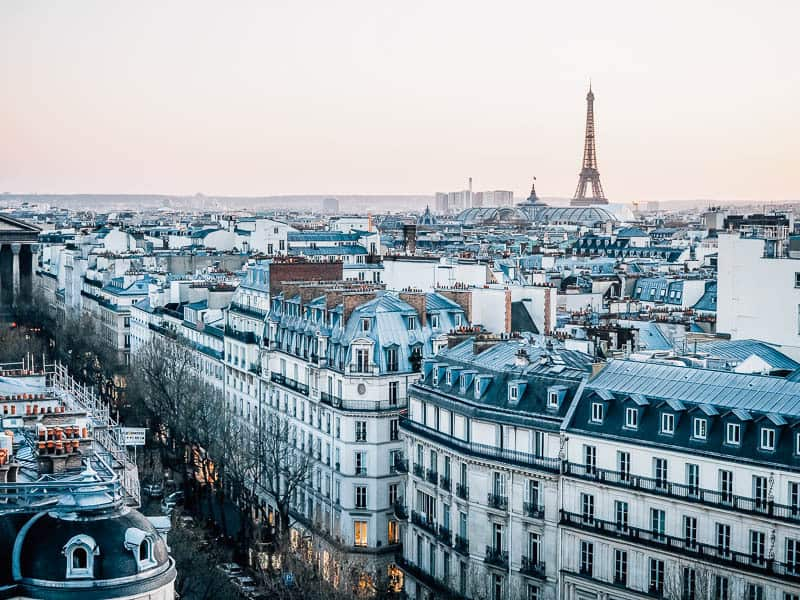

In [1]:
import pyspark

spark = pyspark.sql.SparkSession.builder.appName("French Real Estate Market").getOrCreate()

The real estate market dataset looks like this. 
There are 11 different variables for each property:
- City: where the property is located
- Sale Date: the date when the property was sold
- Sale Type: the type of sale
- Price: the price of the transaction (in €)
- Postal Code: the postal code where the property is located
- Commune: the city/town where the property is located
- Number of lots: number of tracts or parcels of land related to the property
- Local type: the type of the property
- Living area: the meters squared in the property
- Number of rooms: the number of rooms in the property
- Land area: the meters squared of the garden (if existing)

In [2]:
real_estate = spark.read.csv('real_estate_transactions.csv', header=True, dateFormat='dd/MM/YYYY', sep=';', encoding='UTF-8',)

real_estate.show(10)

+----+----------+---------+---------+-----------+-------+--------------+----------+-----------+---------------+---------+
|City| Sale Date|Sale Type|    Price|Postal Code|Commune|Number of lots|Local Type|Living Area|Number of rooms|Land Area|
+----+----------+---------+---------+-----------+-------+--------------+----------+-----------+---------------+---------+
|NICE|26/03/2015|     SALE|102000,00|       6000|   NICE|             1| APARTMENT|         29|              2|     null|
|NICE|07/04/2015|     SALE| 32000,00|       6000|   NICE|             1|DEPENDENCY|          0|              0|     null|
|NICE|10/04/2015|     SALE|239000,00|       6200|   NICE|             1| APARTMENT|         51|              2|     null|
|NICE|10/04/2015|     SALE|239000,00|       6200|   NICE|             1|DEPENDENCY|          0|              0|     null|
|NICE|23/03/2015|     SALE| 30000,00|       6000|   NICE|             1|DEPENDENCY|          0|              0|     null|
|NICE|23/03/2015|     SA

In [3]:
real_estate.printSchema()

root
 |-- City: string (nullable = true)
 |-- Sale Date: string (nullable = true)
 |-- Sale Type: string (nullable = true)
 |-- Price: string (nullable = true)
 |-- Postal Code: string (nullable = true)
 |-- Commune: string (nullable = true)
 |-- Number of lots: string (nullable = true)
 |-- Local Type: string (nullable = true)
 |-- Living Area: string (nullable = true)
 |-- Number of rooms: string (nullable = true)
 |-- Land Area: string (nullable = true)



At the beginning all the variables are type string: we create a new schema with the correct type for each variable

In [4]:
from pyspark.sql.types import *

real_estate_schema =StructType ( [StructField("city", StringType(), True),
                                  StructField("sale_date", DateType(), True),
                                  StructField("sale_type", StringType(), True),
                                  StructField("price", StringType(), True),
                                  StructField("postal_code", IntegerType(), True),
                                  StructField("commune", StringType(), True),
                                  StructField("number_of_lots", IntegerType(), True),
                                  StructField("local_type", StringType(), True),
                                  StructField("living_area", IntegerType(), True),
                                  StructField("number_of_rooms", IntegerType(), True),
                                  StructField("land_area", IntegerType(), True)]
                                )    

In [5]:
spark.conf.set("spark.sql.legacy.timeParserPolicy","Legacy")

real_estate = spark.read.csv('real_estate_transactions.csv', header=True, sep=';', dateFormat='dd/MM/YYYY', schema=real_estate_schema)

from pyspark.sql.functions import regexp_replace
real_estate = real_estate.withColumn('price', regexp_replace('price', ',', '.'))
real_estate = real_estate.withColumn('price',real_estate['price'].cast("int").alias('price'))
real_estate.show(20)

+----+----------+---------+------+-----------+-------+--------------+----------+-----------+---------------+---------+
|city| sale_date|sale_type| price|postal_code|commune|number_of_lots|local_type|living_area|number_of_rooms|land_area|
+----+----------+---------+------+-----------+-------+--------------+----------+-----------+---------------+---------+
|NICE|2015-03-26|     SALE|102000|       6000|   NICE|             1| APARTMENT|         29|              2|     null|
|NICE|2015-04-07|     SALE| 32000|       6000|   NICE|             1|DEPENDENCY|          0|              0|     null|
|NICE|2015-04-10|     SALE|239000|       6200|   NICE|             1| APARTMENT|         51|              2|     null|
|NICE|2015-04-10|     SALE|239000|       6200|   NICE|             1|DEPENDENCY|          0|              0|     null|
|NICE|2015-03-23|     SALE| 30000|       6000|   NICE|             1|DEPENDENCY|          0|              0|     null|
|NICE|2015-03-23|     SALE|410000|       6200|  

In [6]:
real_estate.createOrReplaceTempView('real_estate')

In [7]:
real_estate.printSchema()

root
 |-- city: string (nullable = true)
 |-- sale_date: date (nullable = true)
 |-- sale_type: string (nullable = true)
 |-- price: integer (nullable = true)
 |-- postal_code: integer (nullable = true)
 |-- commune: string (nullable = true)
 |-- number_of_lots: integer (nullable = true)
 |-- local_type: string (nullable = true)
 |-- living_area: integer (nullable = true)
 |-- number_of_rooms: integer (nullable = true)
 |-- land_area: integer (nullable = true)



We compute the number of properties (lines) in our dataset

In [8]:
real_estate_count = spark.sql("SELECT COUNT(*) FROM real_estate ")

real_estate_count.show()

+--------+
|count(1)|
+--------+
|  909724|
+--------+



In [9]:
real_estate = spark.sql("SELECT * FROM real_estate ")

real_estate.show()

+----+----------+---------+------+-----------+-------+--------------+----------+-----------+---------------+---------+
|city| sale_date|sale_type| price|postal_code|commune|number_of_lots|local_type|living_area|number_of_rooms|land_area|
+----+----------+---------+------+-----------+-------+--------------+----------+-----------+---------------+---------+
|NICE|2015-03-26|     SALE|102000|       6000|   NICE|             1| APARTMENT|         29|              2|     null|
|NICE|2015-04-07|     SALE| 32000|       6000|   NICE|             1|DEPENDENCY|          0|              0|     null|
|NICE|2015-04-10|     SALE|239000|       6200|   NICE|             1| APARTMENT|         51|              2|     null|
|NICE|2015-04-10|     SALE|239000|       6200|   NICE|             1|DEPENDENCY|          0|              0|     null|
|NICE|2015-03-23|     SALE| 30000|       6000|   NICE|             1|DEPENDENCY|          0|              0|     null|
|NICE|2015-03-23|     SALE|410000|       6200|  

In [10]:
real_estate_price_year = spark.sql("SELECT YEAR(sale_date) AS year, ROUND(AVG(price)) AS avg_price \
                                       FROM real_estate \
                                       GROUP BY YEAR(sale_date) \
                                       ORDER BY YEAR(sale_date)")

real_estate_price_year.show()

+----+---------+
|year|avg_price|
+----+---------+
|2015|1512275.0|
|2016|1492299.0|
|2017|1393426.0|
|2018|3211482.0|
|2019|1918605.0|
+----+---------+



<AxesSubplot:title={'center':'Average price per year'}, xlabel='year'>

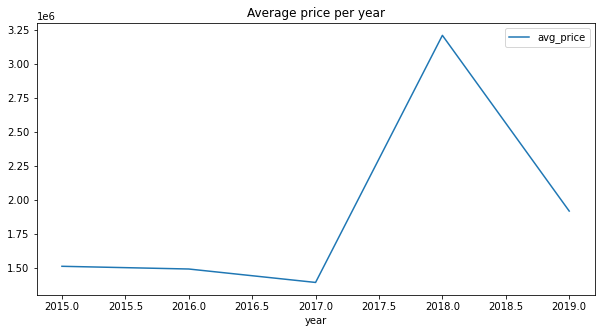

In [11]:
real_estate_price_year.toPandas().plot.line(x='year', y='avg_price', title="Average price per year", figsize=(10,5))

The average price of properties in 2018 seems exaggeratedly high compared to other years, so we decided to zoom in on the highest priced sales in 2018.

In [12]:
real_estate_price_2018 = spark.sql("SELECT * \
                                    FROM real_estate \
                                    WHERE YEAR(sale_date) = 2018 \
                                    ORDER BY price DESC")
real_estate_price_2018.show(100)

+-----+----------+---------+----------+-----------+--------+--------------+--------------------+-----------+---------------+---------+
| city| sale_date|sale_type|     price|postal_code| commune|number_of_lots|          local_type|living_area|number_of_rooms|land_area|
+-----+----------+---------+----------+-----------+--------+--------------+--------------------+-----------+---------------+---------+
|PARIS|2018-08-23|     SALE|1249132030|      75011|PARIS 11|             0|           APARTMENT|         32|              2|      177|
|PARIS|2018-08-23|     SALE|1249132030|      75011|PARIS 11|             0|           APARTMENT|         32|              2|      177|
|PARIS|2018-08-23|     SALE|1249132030|      75011|PARIS 11|             0|           APARTMENT|         32|              2|      177|
|PARIS|2018-08-23|     SALE|1249132030|      75011|PARIS 11|             0|           APARTMENT|         32|              2|      177|
|PARIS|2018-08-23|     SALE|1249132030|      75011|PARI

In [13]:
real_estate_price_2019 = spark.sql("SELECT * \
                                    FROM real_estate \
                                    WHERE YEAR(sale_date) = 2019 \
                                    ORDER BY price DESC")
real_estate_price_2019.show(100)

+-----------+----------+---------+---------+-----------+-----------+--------------+--------------------+-----------+---------------+---------+
|       city| sale_date|sale_type|    price|postal_code|    commune|number_of_lots|          local_type|living_area|number_of_rooms|land_area|
+-----------+----------+---------+---------+-----------+-----------+--------------+--------------------+-----------+---------------+---------+
|   BORDEAUX|2019-01-16|     SALE|221974704|      33300|   BORDEAUX|             0|                null|       null|           null|     2008|
|   BORDEAUX|2019-01-16|     SALE|221974704|      33300|   BORDEAUX|             0|INDUSTRIAL/COMMER...|        576|              0|    90690|
|   BORDEAUX|2019-01-16|     SALE|221974704|      33300|   BORDEAUX|             0|INDUSTRIAL/COMMER...|          0|              0|    90690|
|   BORDEAUX|2019-01-16|     SALE|221974704|      33300|   BORDEAUX|             0|INDUSTRIAL/COMMER...|        923|              0|    90690|

### Removing outliers

We noticed that in Paris there were many transactions on the same day with an exaggeratedly high price (more than one billion euros for flats of just over 30 square metres).
Same for many transactions in Bordeaux, Montpellier and Paris in 2019.
We decided to exclude all these transactions from the dataset as outliers.
We deceided to set our threshold to 100 milion euros: we don't consider real estate properties with a price higher than this because they're out of our study.

In [14]:
real_estate = real_estate.where("price<100000000") 

In [15]:
real_estate.createOrReplaceTempView('real_estate')

In [16]:
real_estate_count = spark.sql("SELECT COUNT(*) FROM real_estate")

real_estate_count.show()

+--------+
|count(1)|
+--------+
|  896056|
+--------+



Now that we have removed the outliers we have a dataset with fewer lines

### Correlation between price and living area

<AxesSubplot:title={'center':'Correlation price and living area'}, xlabel='price', ylabel='living_area'>

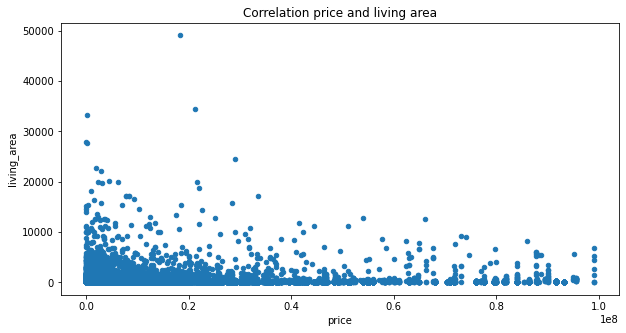

In [17]:
real_estate.toPandas().plot.scatter(x="price", y="living_area", title="Correlation price and living area", figsize=(10,5))

There is an aggregation for real estate assets with relatively low prices and small living areas, which represents the majority of transactions. <br>Greater living areas mostly represent commercial or industrial local types. <br>
We otherwise do not see any clear trend between the price and the living area of these sales.



### Correlation between number of rooms and living area

In [18]:
real_estate_nb_rooms = real_estate.where("number_of_rooms>1") 

<AxesSubplot:title={'center':'Correlation number of rooms and living area'}, xlabel='number_of_rooms', ylabel='living_area'>

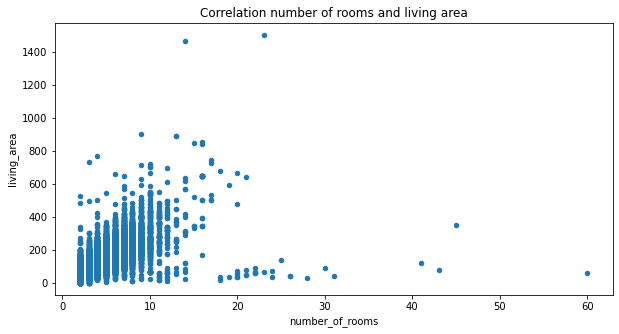

In [19]:
real_estate_nb_rooms.toPandas().plot.scatter(x="number_of_rooms", y="living_area", title="Correlation number of rooms and living area", figsize=(10,5))

For the study of this correlation, we removed the 0-room real estate transactions. This will exclude the commercial/industrial local types but will give us a clearer view on the trend we can here observe. <br>
It shows in particular that there is a positive correlation between the number of rooms of a property and the living area. 


### Average price per year

In [20]:
real_estate_price_year = spark.sql("SELECT YEAR(sale_date) AS year, ROUND(AVG(price)) AS avg_price \
                                    FROM real_estate \
                                    GROUP BY YEAR(sale_date) \
                                    ORDER BY YEAR(sale_date)")

real_estate_price_year.show()

+----+---------+
|year|avg_price|
+----+---------+
|2015|1314488.0|
|2016|1050470.0|
|2017|1151023.0|
|2018|1527682.0|
|2019|1609891.0|
+----+---------+



<AxesSubplot:title={'center':'Average price per year'}, xlabel='year'>

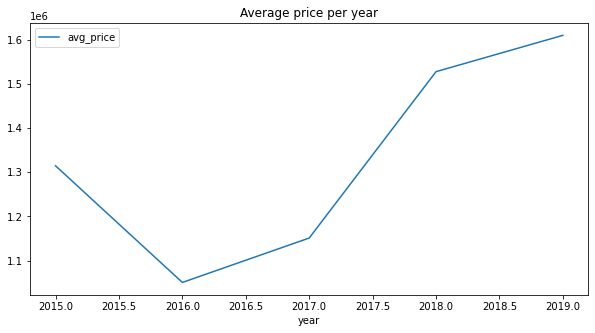

In [21]:
real_estate_price_year.toPandas().plot.line(x='year', y='avg_price', title="Average price per year", figsize=(10,5))

### Average price/m² per year

In [22]:
real_estate_price_meter_squared_year = spark.sql("SELECT YEAR(sale_date) AS year, ROUND(AVG(price/(living_area+land_area))) AS avg_price_meter_squared \
                                                  FROM real_estate \
                                                  GROUP BY YEAR(sale_date) \
                                                  ORDER BY YEAR(sale_date)")

real_estate_price_meter_squared_year.show()

+----+-----------------------+
|year|avg_price_meter_squared|
+----+-----------------------+
|2015|                 5464.0|
|2016|                 4849.0|
|2017|                 5422.0|
|2018|                 9516.0|
|2019|                 5994.0|
+----+-----------------------+



<AxesSubplot:title={'center':'Average price per meter squared per year'}, xlabel='year'>

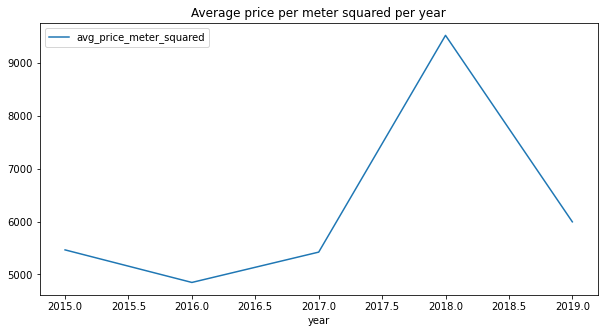

In [23]:
real_estate_price_meter_squared_year.toPandas().plot.line(x='year', y='avg_price_meter_squared', title="Average price per meter squared per year", figsize=(10,5))

Our data shows that the real estate market was at its lowest in 2016 and peaked in 2018 with a price per square meter of €9516 on average. This result is similar to what we observed before removing the price outliers, it should then be interesting to investigate on the market state in 2018 to explain why the prices of transactions were that high. 

### Number of properties per city

In [24]:
real_estate_properties_per_city = spark.sql("SELECT city, COUNT(*) AS nb_of_properties \
                                             FROM real_estate \
                                             GROUP BY city \
                                             ORDER BY nb_of_properties DESC")
real_estate_properties_per_city.show()

+-----------+----------------+
|       city|nb_of_properties|
+-----------+----------------+
|      PARIS|          264703|
|  MARSEILLE|          132746|
|   TOULOUSE|          112681|
|       LYON|           76869|
|     NANTES|           71359|
|       NICE|           67731|
|   BORDEAUX|           65101|
|MONTPELLIER|           55236|
|      LILLE|           49630|
+-----------+----------------+



<AxesSubplot:title={'center':'Number of properties per city'}, xlabel='city'>

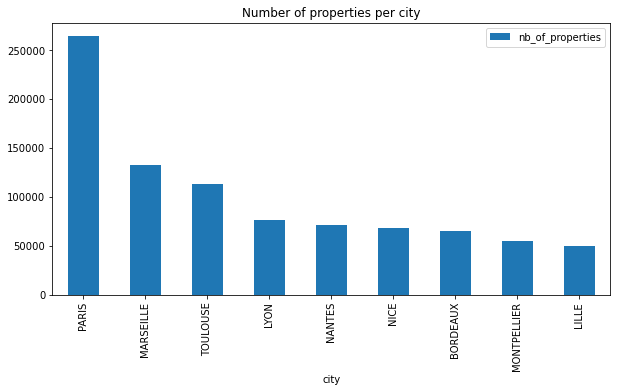

In [25]:
real_estate_properties_per_city.toPandas().plot.bar(x='city', y='nb_of_properties', title="Number of properties per city", figsize=(10,5))

Over those 5 years, Paris has been the most active market with around 260.000 transactions. <br>
Marseille & Toulouse also seem to be dynamic markets and should have the interest of Immo-Inv. <br>
On the other hand, Montpellier & Lille appear as relatively idle markets.

### Average price per city

In [26]:
real_estate_price_city = spark.sql("SELECT city, ROUND(AVG(price)) AS avg_price \
                                    FROM real_estate \
                                    GROUP BY city \
                                    ORDER BY avg_price DESC")

real_estate_price_city.show()

+-----------+---------+
|       city|avg_price|
+-----------+---------+
|      PARIS|2159860.0|
|       LYON|1318278.0|
|  MARSEILLE|1188810.0|
|      LILLE| 926157.0|
|   BORDEAUX| 816254.0|
|     NANTES| 787032.0|
|MONTPELLIER| 756564.0|
|   TOULOUSE| 708686.0|
|       NICE| 647300.0|
+-----------+---------+



<AxesSubplot:title={'center':'Average price per city'}, xlabel='city'>

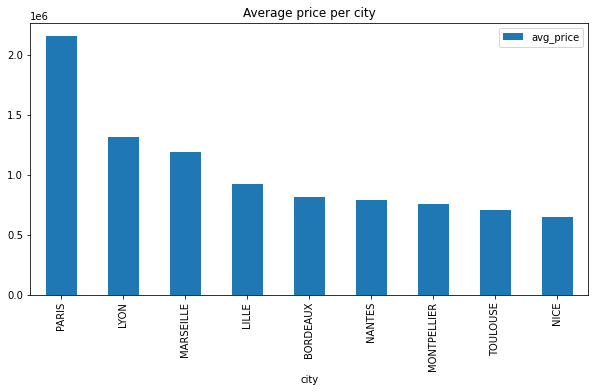

In [27]:
real_estate_price_city.toPandas().plot.bar(x = "city", y="avg_price", title="Average price per city", figsize=(10,5))

The priciest real estate markets are Paris, Lyon & Marseille, which also correspond to the french biggest cities and some of the most active markets. <br>
Surprisingly, Toulouse which is also a pretty active market, displays some of the lowest transaction values. <br>


### Summary table with average price, average living area and average number of rooms per commune

In [28]:
real_estate_price_living_area_commune = spark.sql("SELECT commune, ROUND(AVG(price)) AS avg_price, ROUND(AVG(living_area)) AS avg_living_area, ROUND(AVG(number_of_rooms),2) AS avg_number_of_rooms \
                                                   FROM real_estate \
                                                   GROUP BY commune \
                                                   ORDER BY avg_price DESC")

real_estate_price_living_area_commune.show()

+---------------+---------+---------------+-------------------+
|        commune|avg_price|avg_living_area|avg_number_of_rooms|
+---------------+---------+---------------+-------------------+
|       PARIS 08|7112032.0|           80.0|               1.34|
|      LYON 2EME|4963716.0|           77.0|               1.53|
|       PARIS 04|4368776.0|           52.0|                1.6|
|       PARIS 07|3912149.0|           62.0|               1.81|
|       PARIS 14|3867693.0|           44.0|               1.57|
|       PARIS 01|3415141.0|           67.0|                1.5|
|MARSEILLE 14EME|3153375.0|           63.0|               1.97|
| MARSEILLE 2EME|3028366.0|           62.0|               1.49|
|       PARIS 02|2939780.0|           69.0|               1.29|
|       PARIS 17|2788692.0|           56.0|               1.73|
|MARSEILLE 15EME|2378002.0|           70.0|               1.92|
|       PARIS 09|2252455.0|           68.0|                1.6|
|       PARIS 19|2216535.0|           40

<AxesSubplot:xlabel='avg_price', ylabel='avg_living_area'>

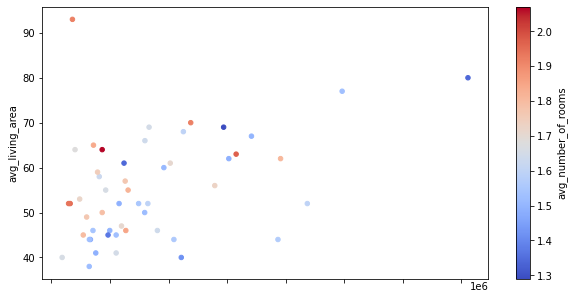

In [29]:
real_estate_price_living_area_commune.toPandas().plot.scatter(x="avg_price", y="avg_living_area", c="avg_number_of_rooms", cmap='coolwarm', figsize=(10,5))

Properties with the greatest number of rooms are not necessarily the most expensive ones, but do in general have a larger living area.

### Number of properties per local type

In [30]:
real_estate_count_local_type = spark.sql("SELECT local_type, COUNT(*) nb_of_properties \
                                          FROM real_estate \
                                          GROUP BY local_type \
                                          ORDER BY nb_of_properties DESC")
real_estate_count_local_type.show()

+--------------------+----------------+
|          local_type|nb_of_properties|
+--------------------+----------------+
|           APARTMENT|          443378|
|          DEPENDENCY|          240336|
|                null|          116278|
|INDUSTRIAL/COMMER...|           58342|
|               HOUSE|           37722|
+--------------------+----------------+



In the past 5 years, most of the transactions were appartments (over 10 times more transactions than for houses), and dependencies. 

### Average price per local type

In [31]:
real_estate_price_local_type = spark.sql("SELECT local_type, ROUND(AVG(price)) AS avg_price \
                                          FROM real_estate \
                                          GROUP BY local_type \
                                          ORDER BY avg_price DESC")
real_estate_price_local_type.show()

+--------------------+---------+
|          local_type|avg_price|
+--------------------+---------+
|INDUSTRIAL/COMMER...|3972629.0|
|                null|1994852.0|
|          DEPENDENCY|1093505.0|
|           APARTMENT| 910761.0|
|               HOUSE| 563881.0|
+--------------------+---------+



<AxesSubplot:title={'center':'Average price per local type'}, xlabel='local_type'>

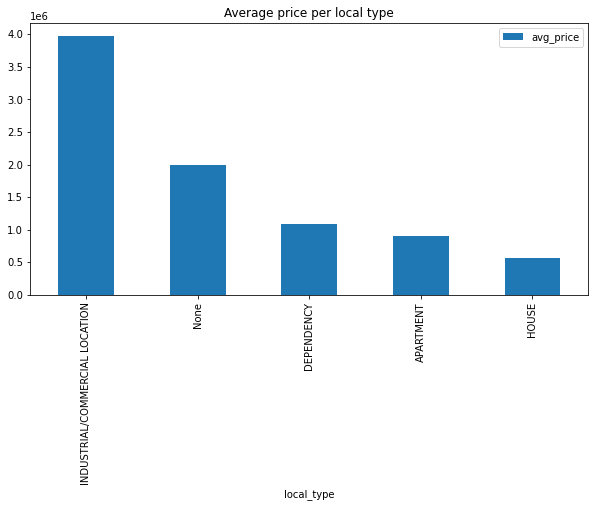

In [32]:
real_estate_price_local_type.toPandas().plot.bar(x = "local_type", y="avg_price", title="Average price per local type", figsize=(10,5))

Industrial & Commercial properties are selling at the highest average price, but as we saw previously they don't represent a great number of transactions.<br>
Dependencies & Appartments also have quite high selling prices, and could be interesting investments to recommand to Immo-Inv.

### Average price of apartments per city

In [33]:
real_estate_price_apartment_city = spark.sql("SELECT city, ROUND(AVG(price)) AS avg_price \
                                              FROM real_estate \
                                              WHERE local_type = 'APARTMENT' \
                                              GROUP BY city \
                                              ORDER BY avg_price DESC")

real_estate_price_apartment_city.show()

+-----------+---------+
|       city|avg_price|
+-----------+---------+
|      PARIS|1285075.0|
|  MARSEILLE|1015046.0|
|       LYON| 792362.0|
|     NANTES| 696792.0|
|   TOULOUSE| 679781.0|
|   BORDEAUX| 609141.0|
|MONTPELLIER| 554924.0|
|       NICE| 329906.0|
|      LILLE| 317371.0|
+-----------+---------+



<AxesSubplot:title={'center':'Average price for the apartments per city'}, xlabel='city'>

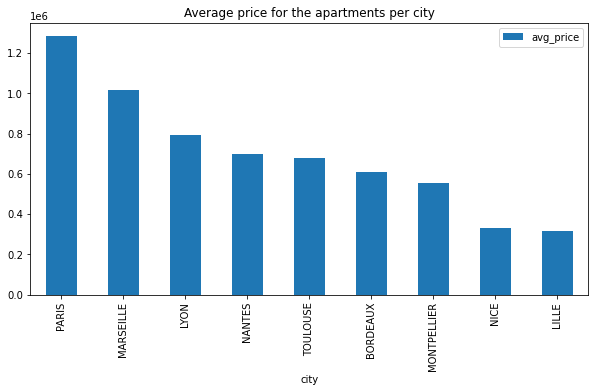

In [34]:
real_estate_price_apartment_city.toPandas().plot.bar(x = "city", y="avg_price", title="Average price for the apartments per city", figsize=(10,5))

Paris, Marseille and Lyon are the cities with the highest average selling prices of properties, while Lille and Nice are notably below the other cities average values.  

### Average price of houses per city

In [35]:
real_estate_price_house_city = spark.sql("SELECT city, ROUND(AVG(price)) AS avg_price \
                                          FROM real_estate \
                                          WHERE local_type = 'HOUSE' \
                                          GROUP BY city \
                                          ORDER BY avg_price DESC")

real_estate_price_house_city.show()

+-----------+---------+
|       city|avg_price|
+-----------+---------+
|      PARIS|3032392.0|
|       LYON| 771714.0|
|       NICE| 741778.0|
|  MARSEILLE| 634997.0|
|   BORDEAUX| 596952.0|
|   TOULOUSE| 516895.0|
|     NANTES| 398431.0|
|MONTPELLIER| 366633.0|
|      LILLE| 270640.0|
+-----------+---------+



<AxesSubplot:title={'center':'Average price for the houses per city'}, xlabel='city'>

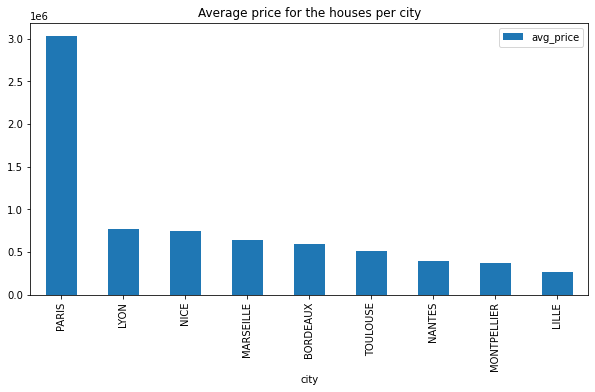

In [36]:
real_estate_price_house_city.toPandas().plot.bar(x = "city", y="avg_price", title="Average price for the houses per city", figsize=(10,5))

Considering the house market, Paris is on average over 3 times more expensive than other big french cities. <br> 
Lyon & Nice are quite close in term of average prices, and thus interesting investments for Immo-Inv. <br>
On the opposite Lille has really low house prices that might not be the most interesting real estate operations. 



### Average price of dependencies per city

In [37]:
real_estate_price_dependency_city = spark.sql("SELECT city, ROUND(AVG(price)) AS avg_price \
                                               FROM real_estate \
                                               WHERE local_type = 'DEPENDENCY' \
                                               GROUP BY city \
                                               ORDER BY avg_price DESC")

real_estate_price_dependency_city.show()

+-----------+---------+
|       city|avg_price|
+-----------+---------+
|      PARIS|2270997.0|
|  MARSEILLE|1109156.0|
|     NANTES| 811617.0|
|       LYON| 657110.0|
|   TOULOUSE| 637423.0|
|   BORDEAUX| 563509.0|
|MONTPELLIER| 388494.0|
|       NICE| 357629.0|
|      LILLE| 316959.0|
+-----------+---------+



<AxesSubplot:title={'center':'Average price for the dependency per city'}, xlabel='city'>

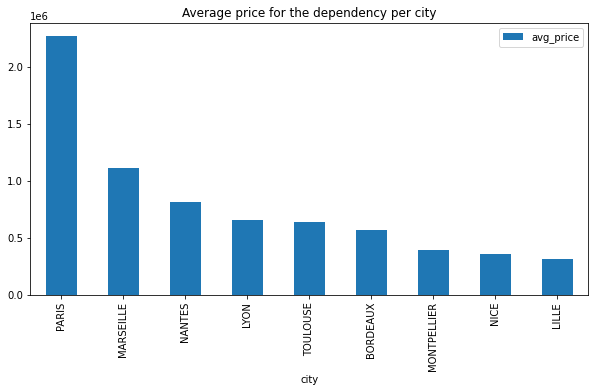

In [38]:
real_estate_price_dependency_city.toPandas().plot.bar(x = "city", y="avg_price", title="Average price for the dependency per city", figsize=(10,5))

Dependencies have also been identified as good investments. Here we can observe that Paris have the higher prices, followed by Marseille & Nantes.

### Number of properties per sale type

In [39]:
real_estate_count_sale_type = spark.sql("SELECT sale_type, COUNT(*) nb_of_properties \
                                         FROM real_estate \
                                         GROUP BY sale_type \
                                         ORDER BY nb_of_properties DESC")
real_estate_count_sale_type.show()

+--------------------+----------------+
|           sale_type|nb_of_properties|
+--------------------+----------------+
|                SALE|          741287|
|SALE BEFORE COMPL...|          147426|
|            EXCHANGE|            3538|
|        ADJUDICATION|            3169|
|      LAND ONLY SALE|             440|
|       EXPROPRIATION|             196|
+--------------------+----------------+



The most common type of transactions are sales and sales before completion. Other types of transactions are marginal.  

### Average price per sale type

In [40]:
real_estate_price_sale_type = spark.sql("SELECT sale_type, ROUND(AVG(price)) AS avg_price \
                                         FROM real_estate \
                                         GROUP BY sale_type \
                                         ORDER BY avg_price DESC")
real_estate_price_sale_type.show()

+--------------------+---------+
|           sale_type|avg_price|
+--------------------+---------+
|      LAND ONLY SALE|3233179.0|
|SALE BEFORE COMPL...|1403904.0|
|                SALE|1266006.0|
|            EXCHANGE| 772835.0|
|       EXPROPRIATION| 619036.0|
|        ADJUDICATION| 598097.0|
+--------------------+---------+



<AxesSubplot:title={'center':'Average price per sale type'}, xlabel='sale_type'>

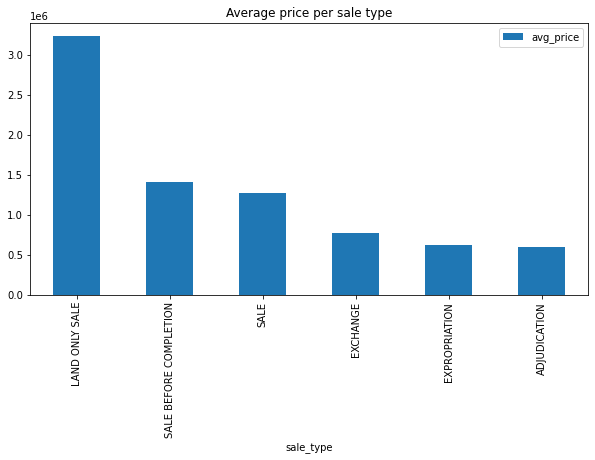

In [41]:
real_estate_price_sale_type.toPandas().plot.bar(x = "sale_type", y="avg_price", title="Average price per sale type", figsize=(10,5))

Properties composed only of land have the greatest selling prices, followed by sales before completion & sales.

### Evolution of the average price per city per year

In [42]:
real_estate_price_city_year_paris = spark.sql("SELECT YEAR(sale_date) AS year, ROUND(AVG(price)) AS avg_price_paris \
                                               FROM real_estate \
                                               WHERE city = 'PARIS' \
                                               GROUP BY YEAR(sale_date) \
                                               ORDER BY YEAR(sale_date)")
real_estate_price_city_year_paris.show()
real_estate_price_city_year_marseille = spark.sql("SELECT YEAR(sale_date) AS year, ROUND(AVG(price)) AS avg_price_marseille \
                                                   FROM real_estate \
                                                   WHERE city = 'MARSEILLE' \
                                                   GROUP BY YEAR(sale_date) \
                                                   ORDER BY YEAR(sale_date)")
real_estate_price_city_year_marseille.show()
real_estate_price_city_year_nantes = spark.sql("SELECT YEAR(sale_date) AS year, ROUND(AVG(price)) AS avg_price_nantes \
                                                FROM real_estate \
                                                WHERE city = 'NANTES' \
                                                GROUP BY YEAR(sale_date) \
                                                ORDER BY YEAR(sale_date)")
real_estate_price_city_year_nantes.show()
real_estate_price_city_year_lyon = spark.sql("SELECT YEAR(sale_date) AS year, ROUND(AVG(price)) AS avg_price_lyon \
                                              FROM real_estate \
                                              WHERE city = 'LYON' \
                                              GROUP BY YEAR(sale_date) \
                                              ORDER BY YEAR(sale_date)")
real_estate_price_city_year_lyon.show()
real_estate_price_city_year_toulouse = spark.sql("SELECT YEAR(sale_date) AS year, ROUND(AVG(price)) AS avg_price_toulouse \
                                                  FROM real_estate \
                                                  WHERE city = 'TOULOUSE' \
                                                  GROUP BY YEAR(sale_date) \
                                                  ORDER BY YEAR(sale_date)")
real_estate_price_city_year_toulouse.show()
real_estate_price_city_year_bordeaux = spark.sql("SELECT YEAR(sale_date) AS year, ROUND(AVG(price)) AS avg_price_bordeaux \
                                                  FROM real_estate \
                                                  WHERE city = 'BORDEAUX' \
                                                  GROUP BY YEAR(sale_date) \
                                                  ORDER BY YEAR(sale_date)")
real_estate_price_city_year_bordeaux.show()
real_estate_price_city_year_montpellier = spark.sql("SELECT YEAR(sale_date) AS year, ROUND(AVG(price)) AS avg_price_montpellier \
                                                     FROM real_estate \
                                                     WHERE city = 'MONTPELLIER' \
                                                     GROUP BY YEAR(sale_date) \
                                                     ORDER BY YEAR(sale_date)")
real_estate_price_city_year_montpellier.show()
real_estate_price_city_year_nice = spark.sql("SELECT YEAR(sale_date) AS year, ROUND(AVG(price)) AS avg_price_nice \
                                              FROM real_estate \
                                              WHERE city = 'NICE' \
                                              GROUP BY YEAR(sale_date) \
                                              ORDER BY YEAR(sale_date)")
real_estate_price_city_year_nice.show()
real_estate_price_city_year_lille = spark.sql("SELECT YEAR(sale_date) AS year, ROUND(AVG(price)) AS avg_price_lille \
                                               FROM real_estate \
                                               WHERE city = 'LILLE' \
                                               GROUP BY YEAR(sale_date) \
                                               ORDER BY YEAR(sale_date)")
real_estate_price_city_year_lille.show()

+----+---------------+
|year|avg_price_paris|
+----+---------------+
|2015|      1918066.0|
|2016|      1821222.0|
|2017|      2007712.0|
|2018|      2987086.0|
|2019|      1839401.0|
+----+---------------+

+----+-------------------+
|year|avg_price_marseille|
+----+-------------------+
|2015|           667392.0|
|2016|           755205.0|
|2017|          1223916.0|
|2018|          1113563.0|
|2019|          3142994.0|
+----+-------------------+

+----+----------------+
|year|avg_price_nantes|
+----+----------------+
|2015|        469301.0|
|2016|        774465.0|
|2017|        588212.0|
|2018|        553078.0|
|2019|       2321750.0|
+----+----------------+

+----+--------------+
|year|avg_price_lyon|
+----+--------------+
|2015|     1608486.0|
|2016|      897295.0|
|2017|     1049298.0|
|2018|     2195623.0|
|2019|      784824.0|
+----+--------------+

+----+------------------+
|year|avg_price_toulouse|
+----+------------------+
|2015|         1292494.0|
|2016|          497482.0|
|2

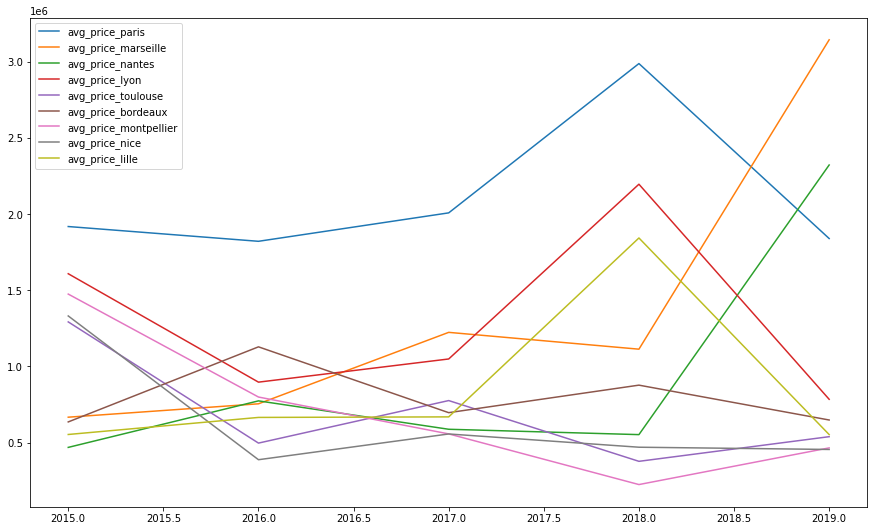

In [43]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,9))
plt.plot('year', 'avg_price_paris', data=real_estate_price_city_year_paris.toPandas())
plt.plot('year', 'avg_price_marseille', data=real_estate_price_city_year_marseille.toPandas())
plt.plot('year', 'avg_price_nantes', data=real_estate_price_city_year_nantes.toPandas())
plt.plot('year', 'avg_price_lyon', data=real_estate_price_city_year_lyon.toPandas())
plt.plot('year', 'avg_price_toulouse', data=real_estate_price_city_year_toulouse.toPandas())
plt.plot('year', 'avg_price_bordeaux', data=real_estate_price_city_year_bordeaux.toPandas())
plt.plot('year', 'avg_price_montpellier', data=real_estate_price_city_year_montpellier.toPandas())
plt.plot('year', 'avg_price_nice', data=real_estate_price_city_year_nice.toPandas())
plt.plot('year', 'avg_price_lille', data=real_estate_price_city_year_lille.toPandas())
plt.legend()

Toulouse and Montpellier are low priced cities, but with a light positive growth. Properties in these cities seem like interesting long term investments. 

Marseille and Nantes prices are quickly rising, we can identify them as good short term investments.

Bordeaux, Lyon and Lille prices' are declining thus we will not recommand them as appealing investments.<br> Paris' prices appear to be decreasing too, but as this city is a specific market that will never go down, we can target Paris' properties as good investments and take advantage of that devaluation. 


### Evolution of the number of properties per city per year

In [44]:
real_estate_count_city_year_paris = spark.sql("SELECT YEAR(sale_date) AS year, COUNT(*) AS nb_of_properties_paris \
                                               FROM real_estate \
                                               WHERE city = 'PARIS' \
                                               GROUP BY YEAR(sale_date) \
                                               ORDER BY YEAR(sale_date)")
real_estate_count_city_year_paris.show()
real_estate_count_city_year_marseille = spark.sql("SELECT YEAR(sale_date) AS year, COUNT(*) AS nb_of_properties_marseille \
                                                   FROM real_estate \
                                                   WHERE city = 'MARSEILLE' \
                                                   GROUP BY YEAR(sale_date) \
                                                   ORDER BY YEAR(sale_date)")
real_estate_count_city_year_marseille.show()
real_estate_count_city_year_nantes = spark.sql("SELECT YEAR(sale_date) AS year, COUNT(*) AS nb_of_properties_nantes \
                                                FROM real_estate \
                                                WHERE city = 'NANTES' \
                                                GROUP BY YEAR(sale_date) \
                                                ORDER BY YEAR(sale_date)")
real_estate_count_city_year_nantes.show()
real_estate_count_city_year_lyon = spark.sql("SELECT YEAR(sale_date) AS year, COUNT(*) AS nb_of_properties_lyon \
                                              FROM real_estate \
                                              WHERE city = 'LYON' \
                                              GROUP BY YEAR(sale_date) \
                                              ORDER BY YEAR(sale_date)")
real_estate_count_city_year_lyon.show()
real_estate_count_city_year_toulouse = spark.sql("SELECT YEAR(sale_date) AS year, COUNT(*) AS nb_of_properties_toulouse \
                                                  FROM real_estate \
                                                  WHERE city = 'TOULOUSE' \
                                                  GROUP BY YEAR(sale_date) \
                                                  ORDER BY YEAR(sale_date)")
real_estate_count_city_year_toulouse.show()
real_estate_count_city_year_bordeaux = spark.sql("SELECT YEAR(sale_date) AS year, COUNT(*) AS nb_of_properties_bordeaux \
                                                  FROM real_estate \
                                                  WHERE city = 'BORDEAUX' \
                                                  GROUP BY YEAR(sale_date) \
                                                  ORDER BY YEAR(sale_date)")
real_estate_count_city_year_bordeaux.show()
real_estate_count_city_year_montpellier = spark.sql("SELECT YEAR(sale_date) AS year, COUNT(*) AS nb_of_properties_montpellier \
                                                     FROM real_estate \
                                                     WHERE city = 'MONTPELLIER' \
                                                     GROUP BY YEAR(sale_date) \
                                                     ORDER BY YEAR(sale_date)")
real_estate_count_city_year_montpellier.show()
real_estate_count_city_year_nice = spark.sql("SELECT YEAR(sale_date) AS year, COUNT(*) AS nb_of_properties_nice \
                                              FROM real_estate \
                                              WHERE city = 'NICE' \
                                              GROUP BY YEAR(sale_date) \
                                              ORDER BY YEAR(sale_date)")
real_estate_count_city_year_nice.show()
real_estate_count_city_year_lille = spark.sql("SELECT YEAR(sale_date) AS year, COUNT(*) AS nb_of_properties_lille \
                                               FROM real_estate \
                                               WHERE city = 'LILLE' \
                                               GROUP BY YEAR(sale_date) \
                                               ORDER BY YEAR(sale_date)")
real_estate_count_city_year_lille.show()

+----+----------------------+
|year|nb_of_properties_paris|
+----+----------------------+
|2015|                 60435|
|2016|                 57563|
|2017|                 64365|
|2018|                 61241|
|2019|                 21099|
+----+----------------------+

+----+--------------------------+
|year|nb_of_properties_marseille|
+----+--------------------------+
|2015|                     25475|
|2016|                     28142|
|2017|                     34739|
|2018|                     30787|
|2019|                     13603|
+----+--------------------------+

+----+-----------------------+
|year|nb_of_properties_nantes|
+----+-----------------------+
|2015|                  13120|
|2016|                  15666|
|2017|                  18759|
|2018|                  16087|
|2019|                   7727|
+----+-----------------------+

+----+---------------------+
|year|nb_of_properties_lyon|
+----+---------------------+
|2015|                19751|
|2016|                1972

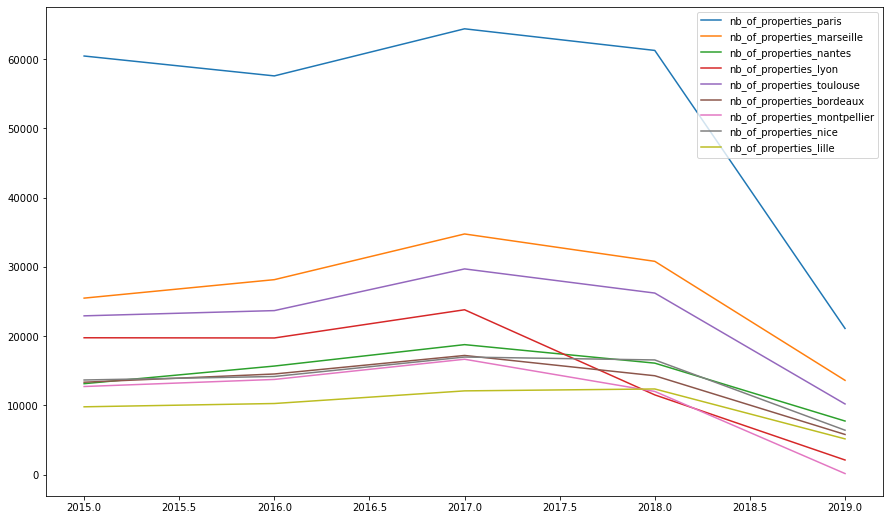

In [45]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,9))
plt.plot('year', 'nb_of_properties_paris', data=real_estate_count_city_year_paris.toPandas())
plt.plot('year', 'nb_of_properties_marseille', data=real_estate_count_city_year_marseille.toPandas())
plt.plot('year', 'nb_of_properties_nantes', data=real_estate_count_city_year_nantes.toPandas())
plt.plot('year', 'nb_of_properties_lyon', data=real_estate_count_city_year_lyon.toPandas())
plt.plot('year', 'nb_of_properties_toulouse', data=real_estate_count_city_year_toulouse.toPandas())
plt.plot('year', 'nb_of_properties_bordeaux', data=real_estate_count_city_year_bordeaux.toPandas())
plt.plot('year', 'nb_of_properties_montpellier', data=real_estate_count_city_year_montpellier.toPandas())
plt.plot('year', 'nb_of_properties_nice', data=real_estate_count_city_year_nice.toPandas())
plt.plot('year', 'nb_of_properties_lille', data=real_estate_count_city_year_lille.toPandas())
plt.legend()

The number of properties sold is dropping for every cities in 2019. This may be due to a really bad conjuncture, or to a lack of data for this year. 

If we consider that this is a result of missing data, we should stop our analysis in 2018. We would then see that the only city where the number of properties is noticeably collapsing is Lyon. The causes of this declining market could be prices getting to high for buyers, or a rarefaction of available properties.

## Key Findings


We identified sale outliers of transactions with exaggeratedly high selling prices for small surfaces, and decided to exclude properties selling at more than 100 millions euros from our study to have a more acurate sample of the french real estate market to study. 

We nevertheless did not see any clear trend between prices & living areas when looking at all the transactions. Some commercial locals were indeed at a cheaper price for enormous surfaces, while some appartments would be way smaller but way more expensive. 
**So Immo-Inv should not specifically focus on the living area when investing in properties.**

When getting out of this transactions' sample the 0-room properties (corresponding to the commercial/industrial properties) we noticed a correlation between the number of rooms and the living area. This correspond to what we could expect from properties, as a greater number of rooms generally means a greater surface. <br>
**We also detected that these larger properties with more rooms were in general not more expensive.** 

The evolution of average price per square meter over years shows that the market peaked in 2018, but went back to its previous values in 2019. <br>
**2019 would then be a good year to invest in real estate for Immo-Inv, but we should nonetheless investigate on the 2018 conjuncture. It would be useful to recognize situations like this year when it would be interesting to sell real estate, but not for buyers to acquire new properties.**

The most dynamic markets of this study are Paris and Marseille, where **Immo-Inv should focus its operations.** <br>
On the other hand Montpellier and Lille are at an idle state and **will not appear as interesting investment locations.**

If we distinguish the local types of the properties, we see that apartments and dependencies are the most common types of transactions in big cities, as houses are less frequent in agglomerations. <br>
We also compared the average price per local type and saw that dependencies and appartments were selling at an higher price than houses. <br>
However we will examine these three types of properties.

When we consider the average prices of the **apartments** transactions, Paris, Lyon and Marseille are on the top of the chart. **Added to the dynamism of these city in terms of transactions, it reinforces the interest Immo-Inv should have in those places.**

For the **house market**, Paris presents as expected way higher prices than ther other french cities. <br>
**Lyon and Nice** have similar average prices for houses and are also interesting points of interest for Immo-Inv.

On the **dependencies market**, the properties selling at the highest prices are in Paris, Marseille and Nantes.

Another type of property to monitor that we will not develop are **land only sales**, as their selling prices are surpassing sales of real properties. 

Finally, comparing the evolution of average transactions' prices per city and year, we can classify the city in terms of interesting long or short term investment: <br>
 - **Long term investments** <br>
Toulouse and Montpellier<br>

- **Short term investments** <br>
Marseille and Nantes